In [1]:
import pandas as pd
import geopy.distance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Properaty Dataset
https://www.properati.com.ar/data 

Los datos usados para este proyecto se pueden encontrar en este link: https://drive.google.com/file/d/1eDLhypP6-XdtWjfcW7HZCBqO56GvOQpu/view?usp=sharing (es un archivo demasiado grande para ser subido al repositorio de github)

In [2]:
properties = pd.read_csv('datasets/ar_properties.csv')

In [3]:
properties.shape

(1000000, 25)

In [4]:
properties.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.

ad_type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).

start_date - Fecha de alta del aviso.

end_date - Fecha de baja del aviso.

created_on - Fecha de alta de la primera versión del aviso.

lat - Latitud.

lon - Longitud.

l1 - Nivel administrativo 1: país.

l2 - Nivel administrativo 2: usualmente provincia.

l3 - Nivel administrativo 3: usualmente ciudad.

l4 - Nivel administrativo 4: usualmente barrio.

rooms - Cantidad de ambientes (útil en Argentina).

bedrooms - Cantidad de dormitorios (útil en el resto de los países).

bathrooms - Cantidad de baños.

surface_total - Superficie total en m².

surface_covered - Superficie cubierta en m².

price - Precio publicado en el anuncio.

currency - Moneda del precio publicado.

price_period - Periodo del precio (Diario, Semanal, Mensual).

title - Título del anuncio.

description - Descripción del anuncio.

operation_type - Tipo de operación (Venta, Alquiler, Alquiler Temporario).

property_type - Tipo de propiedad (Casa, Departamento, PH).

In [5]:
properties['ad_type'].value_counts()

Propiedad    1000000
Name: ad_type, dtype: int64

### Todos los datos son propiedades

In [6]:
properties.head(5)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,jeAsW845majgtrXahBxhdA==,Propiedad,2020-05-03,2020-06-14,2020-05-03,-27.456202,-58.996254,Argentina,Chaco,Resistencia,...,1.0,90.0,90.0,15000.0,ARS,NaN,Garcia Merou 200 10° - $ 15.000 - Departamen...,A 10 cuadras de Plaza Central. A 11 cuadras d...,Departamento,Alquiler
1,H5znou4nQZ9qGlIE8AGEfg==,Propiedad,2020-05-03,2020-06-01,2020-05-03,-45.837618,-67.502089,Argentina,Chubut,Comodoro Rivadavia,...,2.0,NaN,NaN,49000.0,ARS,NaN,"Casa en Alquiler en Medanos km 3, Comodoro riv...","Casa 3 DORMITORIOS en Medanos km 3, Comodoro R...",Casa,Alquiler
2,3Ckjpm2K+6Zn7768DJ6WCQ==,Propiedad,2020-05-03,2020-07-16,2020-05-03,-24.774955,-65.427705,Argentina,Salta,Salta,...,1.0,240.0,256.0,5000000.0,ARS,NaN,CASA EN VENTA JUNIN AL 1100,"Casa ubicada en zona oeste, Junin al 1100, se ...",Casa,Venta
3,DryLs/8cPI9KDfstA5/PaA==,Propiedad,2020-05-03,2020-05-04,2020-05-03,-24.788383,-65.424660,Argentina,Salta,Salta,...,1.0,90.0,90.0,19000.0,ARS,NaN,Muy Lindo Depto 2 Dorm C/cochera Ibazeta Al 1...,Muy lindo departamento de dos dormitorios en a...,Departamento,Alquiler
4,Aefh1PV1CkiMVHj/+ZDFoA==,Propiedad,2020-05-03,2020-09-23,2020-05-03,-24.799061,-65.411911,Argentina,Salta,Salta,...,1.0,85.0,85.0,NaN,NaN,NaN,Exc Depto 2 Dormitorios En Venta C/cochera Alb...,Precio x m2 cubierto al que debe agregársele e...,Departamento,Venta


# Limpieza de datos

### Tomamos las propiedades que están en "Venta"

/Users/luciakasman/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='operation_type', ylabel='count'>

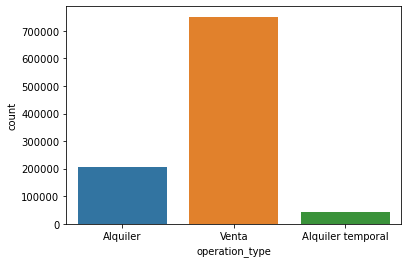

In [7]:
properties['operation_type'].value_counts()
sns.countplot(properties['operation_type'])

In [8]:
properties_sale = properties[properties['operation_type'] == "Venta"]
properties_sale.shape

(750607, 25)

### Tomamos las propiedades que están en "Capital Federal"

/Users/luciakasman/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


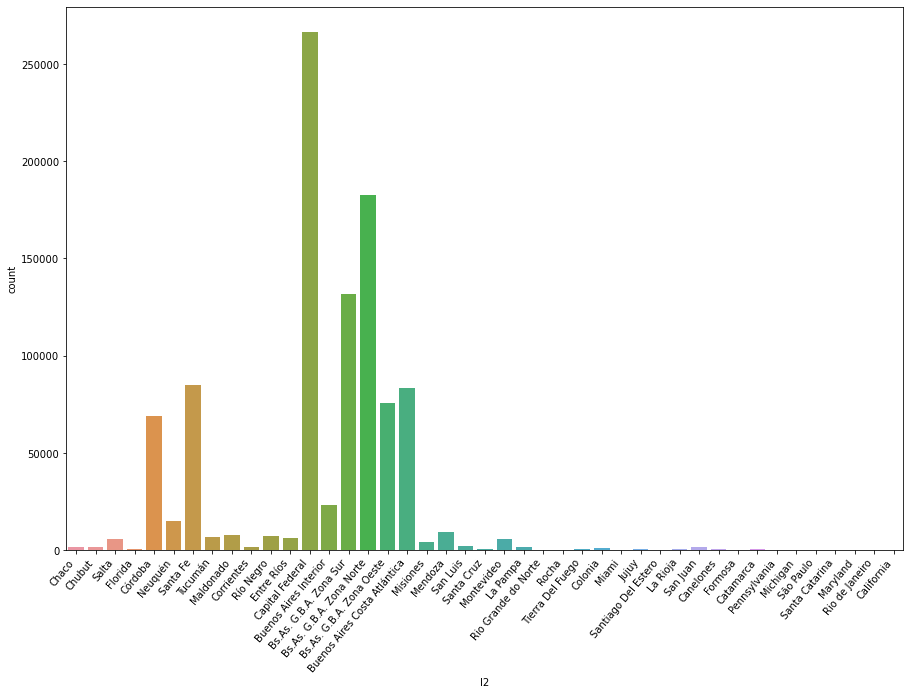

In [9]:
plt.figure(figsize=(15,10))
ax = sns.countplot(properties['l2'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right")
plt.show()

In [10]:
properties_sale_CABA = properties_sale[properties_sale['l2'] == "Capital Federal"]
properties_sale_CABA.shape

(185481, 25)

### Eliminamos las propiedades con el precio en ARS (pesos argentinos) y nos quedamos con las que tiene el precio en USD (dólares)

/Users/luciakasman/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


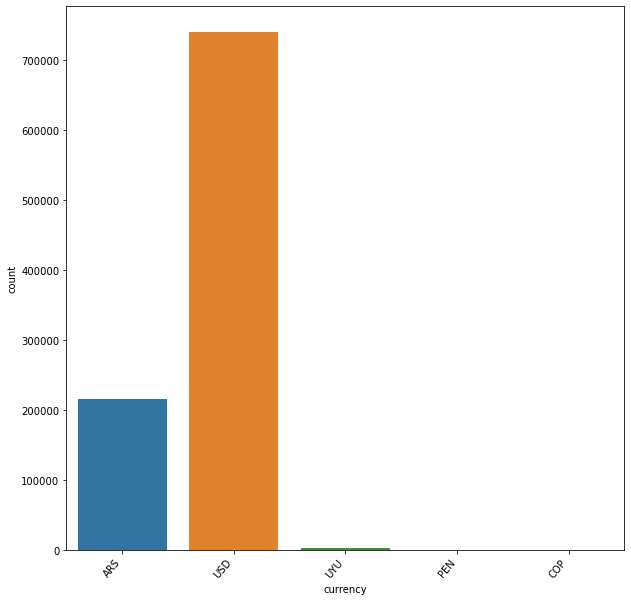

In [11]:
plt.figure(figsize=(10,10))
ax = sns.countplot(properties['currency'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right")
plt.show()

In [12]:
properties_sale_CABA = properties_sale_CABA[properties_sale_CABA['currency'] == "USD"]
properties_sale_CABA.shape

(181303, 25)

### Nos quedamos con las columnas que vamos a utilizar

In [13]:
properties_sale_CABA.drop(['id','ad_type','l1','l2','l4','l5','l6','currency','price_period','title','description','operation_type', 'created_on', 'bedrooms'], axis=1, inplace=True)
properties_sale_CABA.shape

(181303, 11)

### Reemplazamos el nombre de la columna 'l3' por 'neighbourhood'

In [14]:
properties_sale_CABA.rename(columns={'l3': 'neighbourhood'}, inplace=True)

## Unifico los barrios "falsos" con los verdaderos
### Por ejemplo: Once no existe como barrio, es Balvanera, Las Cañitas está en Palermo, etc.

In [15]:
properties_sale_CABA.replace('Parque Centenario', 'Caballito', inplace=True)
properties_sale_CABA.replace('Once', 'Balvanera', inplace=True)
properties_sale_CABA.replace('Catalinas', 'Boca', inplace=True)
properties_sale_CABA.replace('Las Cañitas', 'Palermo', inplace=True)
properties_sale_CABA.replace('Congreso', 'Balvanera', inplace=True)
properties_sale_CABA.replace('Tribunales', 'San Nicolas', inplace=True)
properties_sale_CABA.replace('Centro / Microcentro', 'San Nicolas', inplace=True)
properties_sale_CABA.replace('Abasto', 'Almagro', inplace=True)
properties_sale_CABA.replace('Barrio Norte', 'Recoleta', inplace=True)

## Manejo de NaNs

### Busco la cantidad de NaNs que tiene el dataset por cada columna del mismo

In [16]:
properties_sale_CABA.isna().sum()

start_date             0
end_date               0
lat                11935
lon                11964
neighbourhood       2356
rooms              29213
bathrooms          24285
surface_total      62437
surface_covered    64078
price                  0
property_type          0
dtype: int64

### Vemos que hay muchas variables con valores NaN, así que creamos "reglas" para manejar este problema:

* Eliminamos los valores que tienen los atributos "lat" y "lon" como NaN

In [17]:
properties_sale_CABA.dropna(subset=['lat', 'lon'], axis=0, inplace=True)
properties_sale_CABA.shape

(169339, 11)

* Si el atributo 'rooms' es NaN, entonces eliminamos la fila completa.

In [18]:
properties_sale_CABA.dropna(subset=['rooms'], axis=0, inplace=True)
properties_sale_CABA.shape

(142554, 11)

* Si los atributos 'surface_total' y 'surface_covered' son ambos NaN, entonces eliminamos la fila completa.

In [19]:
properties_sale_CABA.dropna(subset=['surface_total','surface_covered'], how='all', axis=0, inplace=True)
properties_sale_CABA.shape

(99498, 11)

 * Si el atributo 'surface_covered' es mayor a 'surface_total', los intercambio

In [20]:
properties_sale_CABA.query('surface_covered > surface_total').shape

(548, 11)

Hay 539 elementos en donde pasa eso.

In [21]:
properties_sale_CABA['surface_covered'],properties_sale_CABA['surface_total'] = \
    np.where(properties_sale_CABA['surface_covered'] > properties_sale_CABA['surface_total'], \
             (properties_sale_CABA['surface_total'],properties_sale_CABA['surface_covered']), \
             (properties_sale_CABA['surface_covered'],properties_sale_CABA['surface_total']))

In [22]:
properties_sale_CABA.query('surface_covered > surface_total').shape

(0, 11)

Confirmo que ahora no queda ninguno.

* Si los atributos 'surface_total' o 'surface_covered' son NaN, entonces llenamos la columna NaN con los datos de la otra.

In [23]:
properties_sale_CABA['surface_total'].fillna(properties_sale_CABA['surface_covered'], inplace=True)
properties_sale_CABA['surface_covered'].fillna(properties_sale_CABA['surface_total'], inplace=True)

* Si el atributo 'neighbourhood' es NaN, entonces eliminamos la fila completa.

In [24]:
properties_sale_CABA.dropna(subset=['neighbourhood'], axis=0, inplace=True)
properties_sale_CABA.shape

(99189, 11)

* Si el atributo 'bathrooms' es NaN, entonces le ponemos 1.

In [25]:
properties_sale_CABA[['bathrooms']] = properties_sale_CABA[['bathrooms']].fillna(1)

### Todos los datos mal definidos fueron manejados

In [26]:
properties_sale_CABA.isnull().sum()

start_date         0
end_date           0
lat                0
lon                0
neighbourhood      0
rooms              0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

## Agrego una variable más llamada "tiempo_en_venta", que es la diferencia entre el end_date y el start_date 

In [27]:
properties_sale_CABA = properties_sale_CABA[properties_sale_CABA['end_date'] != '9999-12-31']
properties_sale_CABA['tiempo_en_venta'] = (pd.to_datetime(properties_sale_CABA['end_date']) - pd.to_datetime(properties_sale_CABA['start_date'])).dt.days
properties_sale_CABA.drop(['end_date','start_date'], axis=1, inplace=True)
print(properties_sale_CABA.shape)

(87146, 10)


In [28]:
properties_sale_CABA.head(5)

,lat,lon,neighbourhood,rooms,bathrooms,surface_total,surface_covered,price,property_type,tiempo_en_venta
92,-34.603771,-58.381587,Villa Crespo,7.0,2.0,130.0,130.0,320000.0,PH,15
124,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,90000.0,Departamento,15
125,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,80000.0,Departamento,15
126,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,83000.0,Departamento,15
127,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,84000.0,Departamento,15


# Análisis de datos

## Tipos de propiedad 

In [29]:
properties_sale_CABA['property_type'].value_counts()

Departamento       73806
PH                  7779
Casa                3575
Oficina             1006
Local comercial      475
Otro                 238
Lote                 220
Depósito              29
Cochera               16
Casa de campo          2
Name: property_type, dtype: int64

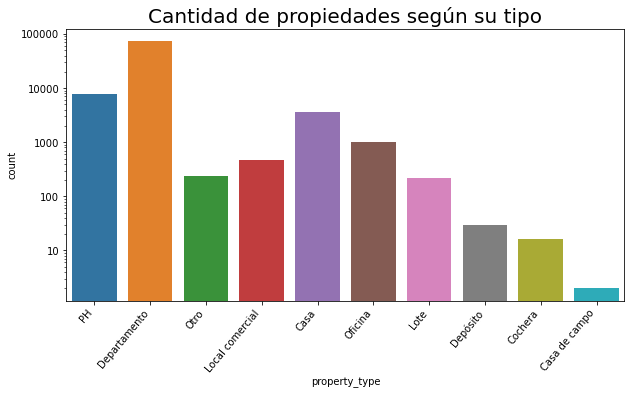

In [30]:
plt.figure(figsize=(10,5))
plt.yscale('log')
ax = sns.countplot(data = properties_sale_CABA, x = "property_type")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right")
ax.set_title("Cantidad de propiedades según su tipo", fontsize=20)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show()

## Eliminamos los elementos correspondientes a "Depósito" y "Cochera", que no poseen ni habitaciones ni baños, y contaminan los datos para el análisis que queremos hacer.

In [31]:
properties_sale_CABA = properties_sale_CABA[properties_sale_CABA['property_type'] != 'Depósito']
properties_sale_CABA = properties_sale_CABA[properties_sale_CABA['property_type'] != 'Cochera']
properties_sale_CABA.shape

(87101, 10)

In [32]:
properties_sale_CABA.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price,tiempo_en_venta
count,87101.00000,87101.00000,87101.00000,87101.00000,87101.00000,87101.00000,87101.00000,87101.00000
mean,-34.59571,-58.43723,2.77798,1.47831,122.22441,94.71838,244836.97966,58.57615
std,0.02544,0.03733,1.52558,0.82329,1245.77477,860.83458,326350.18719,69.43318
min,-34.69899,-58.53092,1.00000,1.00000,1.00000,1.00000,5000.00000,0.00000
25%,-34.61322,-58.46337,2.00000,1.00000,45.00000,41.00000,105000.00000,10.00000
50%,-34.59558,-58.43721,3.00000,1.00000,66.00000,59.00000,155000.00000,29.00000
75%,-34.57819,-58.40981,4.00000,2.00000,106.00000,90.00000,255000.00000,85.00000
max,-34.53596,-58.34395,40.00000,17.00000,170000.00000,124370.00000,15011160.00000,437.00000


Text(0.5, 1.0, 'Heatmap de correlación de dataset Properati')

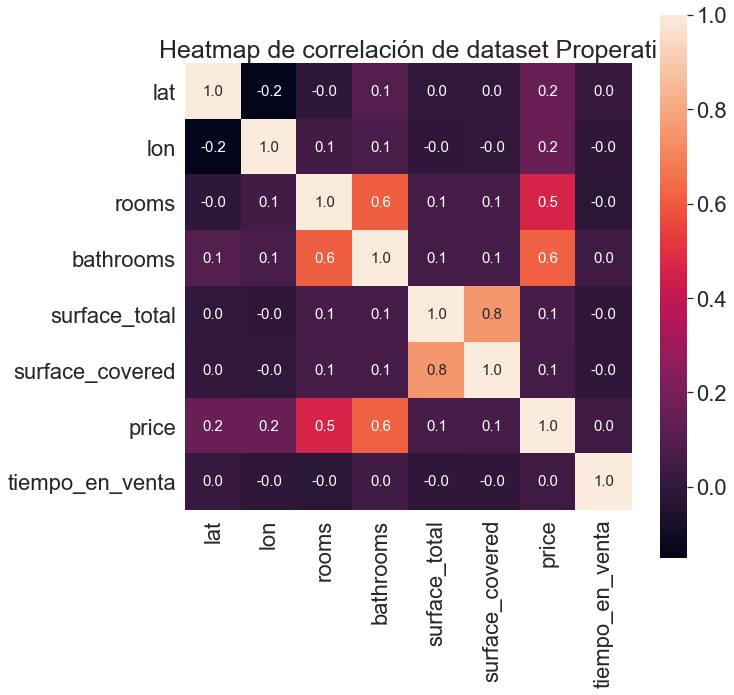

In [33]:
corr = properties_sale_CABA.corr()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})
plt.title("Heatmap de correlación de dataset Properati", fontsize=25)

In [34]:
properties_sale_CABA['price'].sort_values()

803231        5000.0
899718        5000.0
861041        6000.0
523889        6000.0
78473         6500.0
             ...    
155000     7149999.0
233121     7500000.0
714726     8000000.0
972435    12000000.0
510776    15011160.0
Name: price, Length: 87101, dtype: float64

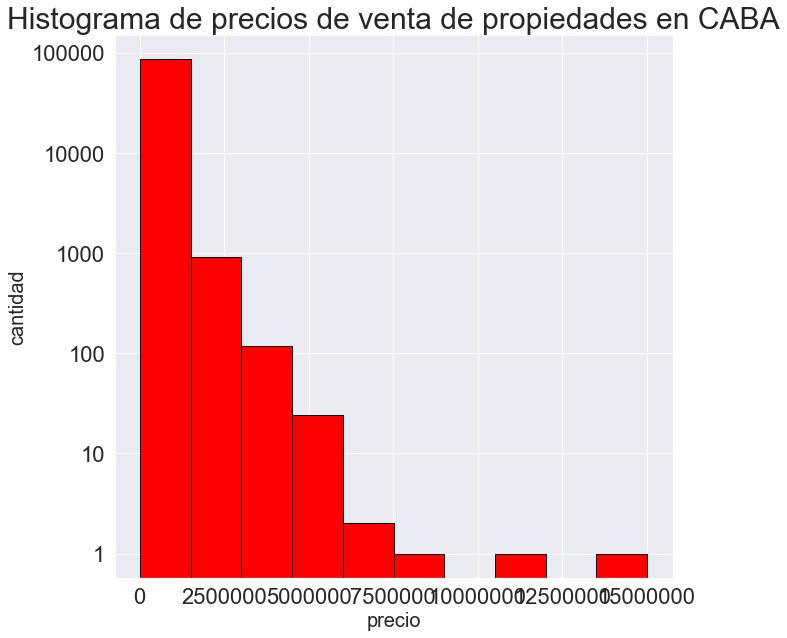

In [35]:
plt.figure(figsize=(10,10))
plt.hist(properties_sale_CABA['price'], bins=10, color='red', ec='black')
plt.yscale('log')
plt.title("Histograma de precios de venta de propiedades en CABA", fontsize=30)
plt.xlabel('precio', fontsize=20)
plt.ylabel('cantidad', fontsize=20)
plt.ticklabel_format(style='plain', axis='x')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show()

## Vemos cómo está distribuido el dataset por barrio

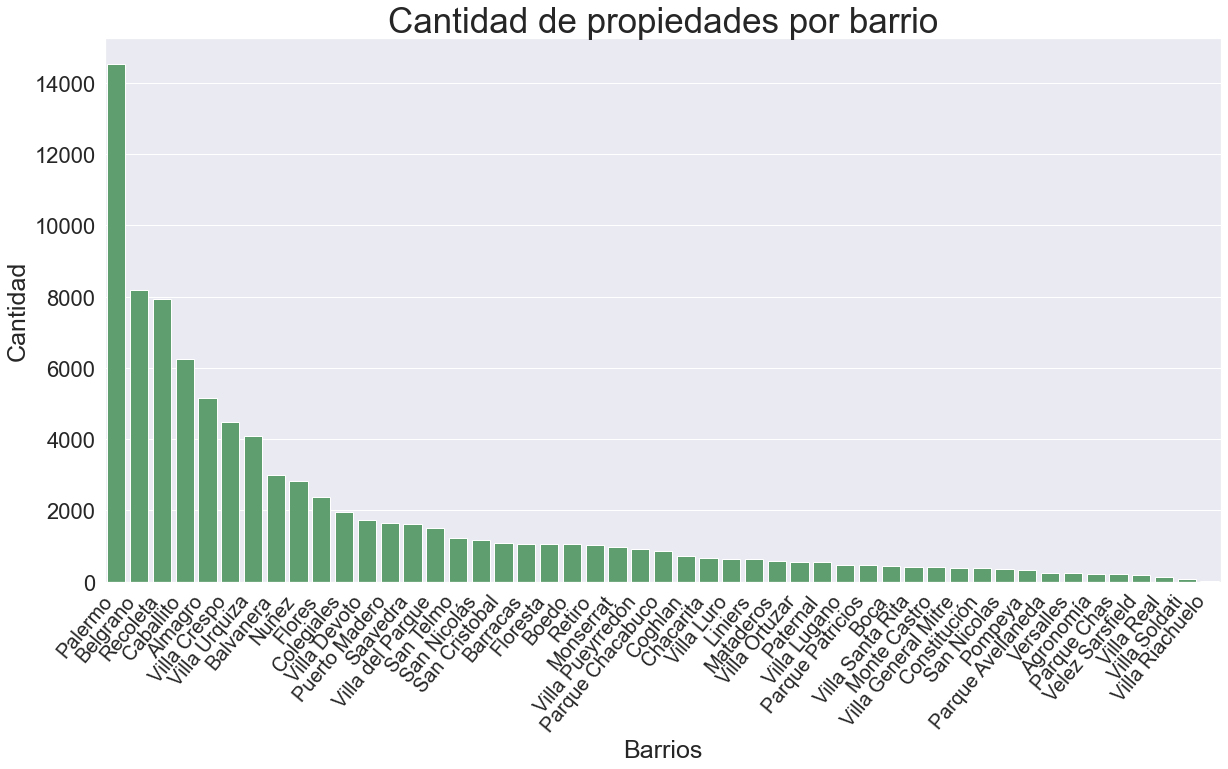

In [36]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
ax = sns.countplot(data=properties_sale_CABA,x="neighbourhood",order=properties_sale_CABA["neighbourhood"].value_counts().index, color="g")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right",fontsize=20)
ax.set_title("Cantidad de propiedades por barrio", fontsize=35)
ax.set_xlabel("Barrios", fontsize=25)
ax.set_ylabel("Cantidad", fontsize=25)
plt.show()

## Vemos la media de precios por barrio

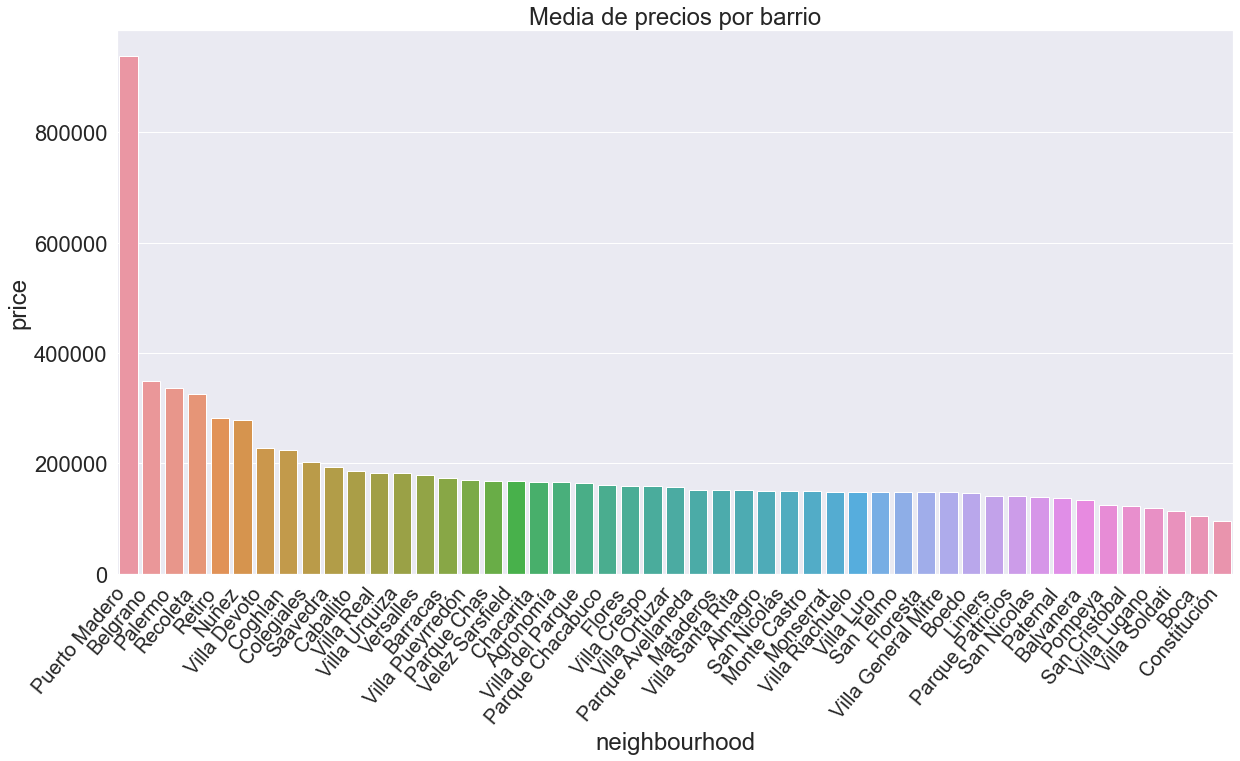

In [37]:
by_neighbourhood = properties_sale_CABA.groupby(by='neighbourhood').mean()

plt.figure(figsize=(20,10))
ax = sns.barplot(x = by_neighbourhood.index, y = by_neighbourhood["price"], order=by_neighbourhood.sort_values('price', ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right",fontsize=20)
plt.title("Media de precios por barrio")
plt.show()

## Analizamos la distribución de precios por barrio

### Buscamos si hay outliers

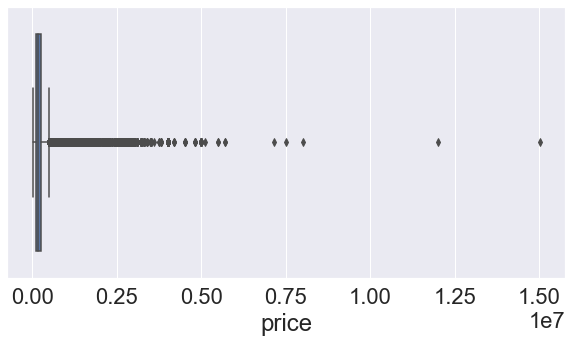

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(data = properties_sale_CABA, x = 'price')
plt.show()

### Vemos cinco puntos que están más lejos que el resto

In [39]:
properties_sale_CABA[properties_sale_CABA['price'] > 0.6e7]

,lat,lon,neighbourhood,rooms,bathrooms,surface_total,surface_covered,price,property_type,tiempo_en_venta
155000,-34.616918,-58.359927,Puerto Madero,3.0,2.0,128.0,118.0,7149999.0,Departamento,93
233121,-34.574726,-58.421360,Palermo,4.0,5.0,800.0,750.0,7500000.0,Departamento,218
510776,-34.597190,-58.434690,Villa Crespo,2.0,1.0,52.0,48.0,15011160.0,Departamento,5
714726,-34.565947,-58.442326,Belgrano,9.0,5.0,1763.0,1763.0,8000000.0,Casa,2
972435,-34.572494,-58.462433,Belgrano,5.0,5.0,3367.0,3197.0,12000000.0,Casa,71


### Los eliminamos, para disminuir la variabilidad

In [40]:
properties_sale_CABA = properties_sale_CABA[properties_sale_CABA['price'] < 0.6e7]

## Percentiles de precios

In [41]:
for i in range(0, 100, 10):
    var =properties_sale_CABA["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 5000.0
10 percentile value is 78000.0
20 percentile value is 95000.0
30 percentile value is 115000.0
40 percentile value is 132452.0
50 percentile value is 155000.0
60 percentile value is 185000.0
70 percentile value is 229000.0
80 percentile value is 295000.0
90 percentile value is 450000.0
100 percentile value is  5700000.0


In [42]:
for i in range(90, 100, 1):
    var =properties_sale_CABA["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 450000.0
91 percentile value is 480000.0
92 percentile value is 520000.0
93 percentile value is 560000.0
94 percentile value is 618000.0
95 percentile value is 690000.0
96 percentile value is 790000.0
97 percentile value is 930000.0
98 percentile value is 1200000.0
99 percentile value is 1680000.0
100 percentile value is  5700000.0


### 90% de los datos tiene precio menor a 450 mil dólares
### 97% de los datos tienen precio menor a 1 millón de dólares

## Graficamos el histograma de precios por cada barrio

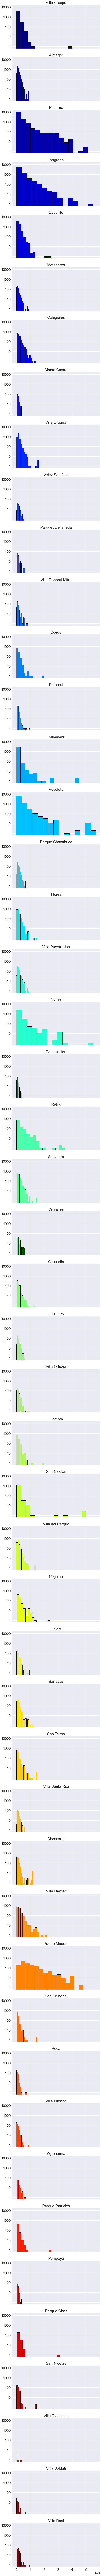

In [43]:
max_price = properties_sale_CABA["price"].max()
min_price = properties_sale_CABA["price"].min()
neighbourhoods = properties_sale_CABA['neighbourhood'].unique()

colormap = plt.cm.jet
colors = [colormap(i) for i in np.linspace(0, 1,len(neighbourhoods))]
fig, axs = plt.subplots(len(neighbourhoods), 1, sharex = True, sharey=True, figsize=(10,300))
for i, group in enumerate(neighbourhoods):
    df = properties_sale_CABA[properties_sale_CABA["neighbourhood"]==group]
    axs[i].hist(df["price"],bins=15, color= colors[i], ec='black')
    axs[i].set_title(group)
    axs[i].set_yscale('log')
    axs[i].yaxis.set_major_formatter(ScalarFormatter())

In [44]:
df_original = properties_sale_CABA.copy()
df_original.columns

Index(['lat', 'lon', 'neighbourhood', 'rooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type', 'tiempo_en_venta'],
      dtype='object')

# <b> Agregamos más datasets </b>

In [45]:
properties_sale_CABA_new_vars = properties_sale_CABA.copy()

## Dataset de estaciones de subtes
https://data.buenosaires.gob.ar/dataset/subte-estaciones/resource/juqdkmgo-1994-resource

In [46]:
subway_stops = pd.read_csv("datasets/estaciones-de-subte.csv", delimiter=',')
subway_stops.drop(['id','estacion','linea'],axis=1, inplace=True)
subway_stops.head()

,long,lat
0,-58.398928,-34.635750
1,-58.400970,-34.629376
2,-58.402323,-34.623092
3,-58.404732,-34.615242
4,-58.406036,-34.608935


In [47]:
# WARNING: TARDA APROXIMADAMENTE 1 HORA EN TERMINAR
def get_close_stops(x1,y1,x2,y2):
    coords_1 = (float(x1), float(y1))
    coords_2 = (float(x2), float(y2))
    return geopy.distance.distance(coords_1, coords_2).km <= 0.5

def calculate(x,y):
    return subway_stops.apply(lambda df: get_close_stops(df['lat'], df['long'], x, y), axis=1).sum()

properties_sale_CABA_new_vars['subway_stops_close'] = properties_sale_CABA_new_vars.apply(lambda x: calculate(x['lat'], x['lon']), axis=1)

## Dataset de paradas de metrobus
https://data.buenosaires.gob.ar/dataset/metrobus/resource/Juqdkmgo-1431222-resource

In [48]:
def get_lat_long (x):
    coords = x.split()[1:]
    for coord in coords:
        return (float(coords[0].replace('(', '')), float(coords[1].replace(')', '')))

metrobus_stops = pd.read_csv('datasets/estaciones-de-metrobus.csv')
metrobus_stops[['long', 'lat']] = pd.DataFrame(metrobus_stops['WKT'].apply(get_lat_long))['WKT'].apply(pd.Series)
metrobus_stops = metrobus_stops.loc[:, ['long', 'lat']]
metrobus_stops.shape

(231, 2)

In [49]:
# WARNING: TARDA APROXIMADAMENTE 2 HORAS EN TERMINAR
def get_close_stops(x1,y1,x2,y2):
    coords_1 = (float(x1), float(y1))
    coords_2 = (float(x2), float(y2))
    return geopy.distance.distance(coords_1, coords_2).km <= 0.5

def calculate(x,y):
    return metrobus_stops.apply(lambda df: get_close_stops(df['lat'], df['long'], x, y), axis=1).sum()

properties_sale_CABA_new_vars['metrobus_stops_close'] = properties_sale_CABA_new_vars.apply(lambda x: calculate(x['lat'], x['lon']), axis=1)

## Unifico los nombres de los barrios, tomando en cuenta los datasets nuevos

In [50]:
properties_sale_CABA_new_vars.replace('San Nicolás', 'San Nicolas', inplace=True)
properties_sale_CABA_new_vars.replace('Agronomía', 'Agronomia', inplace=True)
properties_sale_CABA_new_vars.replace('Villa Pueyrredón', 'Villa Pueyrredon', inplace=True)
properties_sale_CABA_new_vars.replace('Constitución', 'Constitucion', inplace=True)
properties_sale_CABA_new_vars.replace('Villa General Mitre', 'Villa Gral. Mitre', inplace=True)
properties_sale_CABA_new_vars.replace('Pompeya', 'Nueva Pompeya', inplace=True)
properties_sale_CABA_new_vars.replace('Villa del Parque', 'Villa Del Parque', inplace=True)

## Dataset de población por barrio
https://data.buenosaires.gob.ar/dataset/estructura-demografica/resource/c44be985-8d7f-4aa4-972e-a7f8f0b796dc

In [51]:
people_by_neighbourhood = pd.read_csv('datasets/caba_pob_barrios_2010.csv')
people_by_neighbourhood['barrios'] = people_by_neighbourhood['BARRIO'].str.title()
people_by_neighbourhood.drop('BARRIO', axis=1, inplace=True)
people_by_neighbourhood.head()

,POBLACION,barrios
0,13912,Agronomia
1,131699,Almagro
2,138926,Balvanera
3,89452,Barracas
4,126267,Belgrano


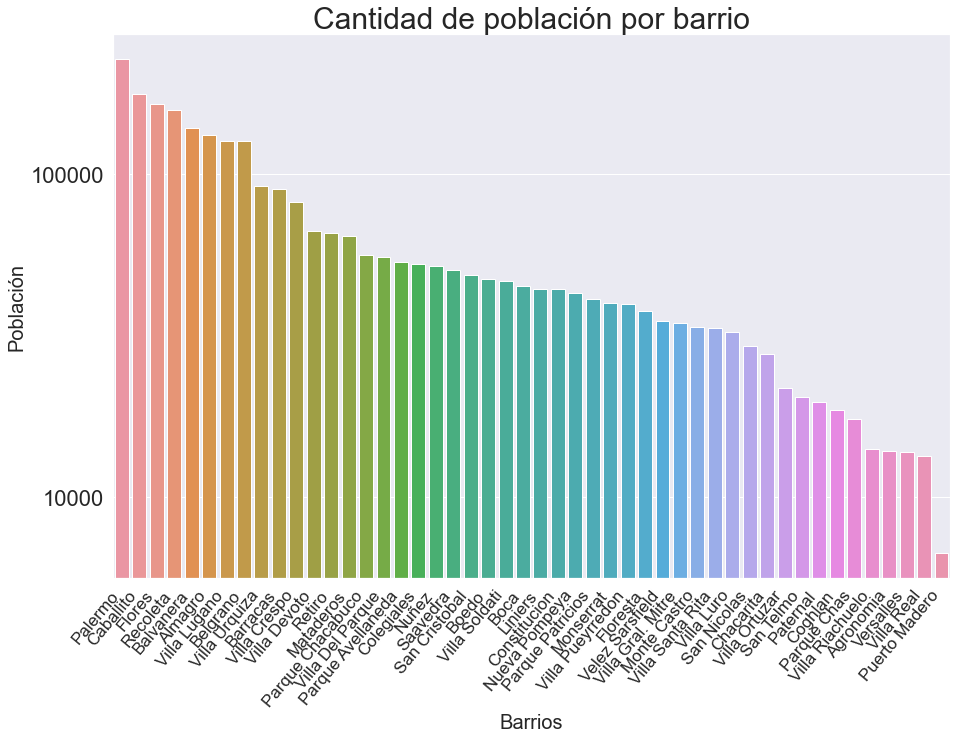

In [52]:
plt.figure(figsize=(15,10))
plt.yscale('log')
ax = sns.barplot(data = people_by_neighbourhood, x = "barrios", y="POBLACION",
    order=people_by_neighbourhood.sort_values('POBLACION', ascending = False).barrios)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right",fontsize=17)
ax.set_title("Cantidad de población por barrio", fontsize=30)
ax.set_xlabel("Barrios", fontsize=20)
ax.set_ylabel("Población", fontsize=20)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show()

## Dataset de áreas verdes
https://data.buenosaires.gob.ar/dataset/espacios-verdes/resource/juqdkmgo-967-resource

In [53]:
green_areas = pd.read_csv('datasets/espacio-verde-publico.csv')
green_areas = green_areas.loc[:,['area', 'BARRIO']]
green_areas['barrios'] = green_areas['BARRIO'].str.title()
green_areas.drop('BARRIO', axis=1, inplace=True)

### Creamos una variable que es el área verde de cada barrio dividido la población de cada barrio

In [54]:
green_areas = green_areas.groupby("barrios").sum()
green_areas_with_population = green_areas.merge(people_by_neighbourhood, on='barrios')
green_areas_with_population["green_area/population"] = green_areas_with_population["area"]/green_areas_with_population["POBLACION"]
green_areas_with_population = green_areas_with_population.drop(columns=["area","POBLACION"])
green_areas_with_population.rename(columns={'barrios': 'neighbourhood'}, inplace=True)
green_areas_with_population.head()

,neighbourhood,green_area/population
0,Agronomia,0.203676
1,Almagro,0.069847
2,Balvanera,0.212694
3,Barracas,2.525820
4,Belgrano,10.123191


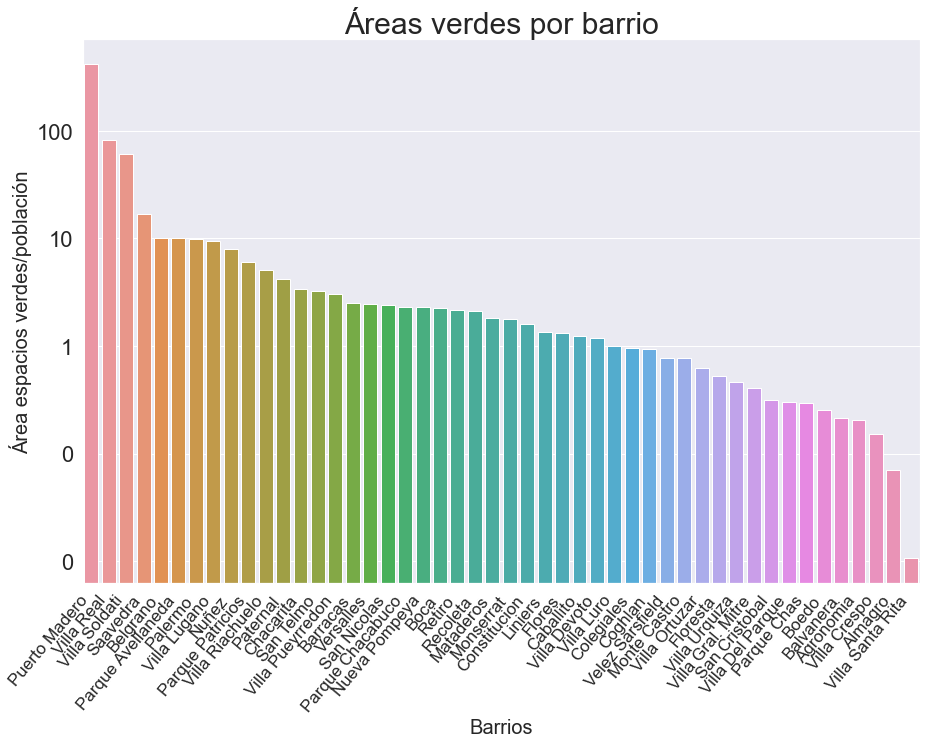

In [55]:
plt.figure(figsize=(15,10))
plt.yscale('log')
ax = sns.barplot(data = green_areas_with_population, x = "neighbourhood", y="green_area/population",
    order=green_areas_with_population.sort_values('green_area/population', ascending = False).neighbourhood)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right",fontsize=17)
ax.set_title("Áreas verdes por barrio", fontsize=30)
ax.set_xlabel("Barrios", fontsize=20)
ax.set_ylabel("Área espacios verdes/población", fontsize=20)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show()

### Agregamos esa información al dataset principal

In [56]:
properties_sale_CABA_new_vars = properties_sale_CABA_new_vars.merge(green_areas_with_population, on='neighbourhood',how="left").fillna(0)

## Extra: Barrios de emergencia
https://www.datos.gob.ar/dataset/desarrollo-social-registro-nacional-barrios-populares/archivo/desarrollo-social_9a951270-60dd-4f21-aa19-4ef1205620bd

### Agregamos esa información al dataset principal

In [57]:
properties_sale_CABA_new_vars.head()

,lat,lon,neighbourhood,rooms,bathrooms,surface_total,surface_covered,price,property_type,tiempo_en_venta,subway_stops_close,metrobus_stops_close,green_area/population
0,-34.603771,-58.381587,Villa Crespo,7.0,2.0,130.0,130.0,320000.0,PH,15,5,6,0.150312
1,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,90000.0,Departamento,15,1,0,0.069847
2,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,80000.0,Departamento,15,1,0,0.069847
3,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,83000.0,Departamento,15,1,0,0.069847
4,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,84000.0,Departamento,15,1,0,0.069847


In [58]:
properties_sale_CABA_new_vars.shape

(87096, 13)

# Análisis de datos con las nuevas variables

In [59]:
properties_sale_CABA_new_vars.columns

Index(['lat', 'lon', 'neighbourhood', 'rooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type', 'tiempo_en_venta',
       'subway_stops_close', 'metrobus_stops_close', 'green_area/population'],
      dtype='object')

In [60]:
properties_sale_CABA_new_vars.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price,tiempo_en_venta,subway_stops_close,metrobus_stops_close,green_area/population
count,87096.00000,87096.00000,87096.00000,87096.00000,87096.00000,87096.00000,87096.00000,87096.00000,87096.00000,87096.00000,87096.00000
mean,-34.59571,-58.43723,2.77788,1.47818,122.16127,94.65636,244280.84649,58.57504,0.68648,1.22056,12.15338
std,0.02544,0.03733,1.52545,0.82305,1245.74746,860.77366,317139.98407,69.43246,1.04593,2.48625,56.72672
min,-34.69899,-58.53092,1.00000,1.00000,1.00000,1.00000,5000.00000,0.00000,0.00000,0.00000,0.01066
25%,-34.61322,-58.46337,2.00000,1.00000,45.00000,41.00000,105000.00000,10.00000,0.00000,0.00000,0.52528
50%,-34.59558,-58.43721,3.00000,1.00000,66.00000,59.00000,155000.00000,29.00000,0.00000,0.00000,2.12766
75%,-34.57819,-58.40981,4.00000,2.00000,106.00000,90.00000,255000.00000,85.00000,1.00000,1.00000,9.78781
max,-34.53596,-58.34395,40.00000,17.00000,170000.00000,124370.00000,5700000.00000,437.00000,10.00000,14.00000,418.26430


## Heatmap de correlación con todas las variables

Text(0.5, 1.0, 'Heatmap de todas las variables del nuevo dataset')

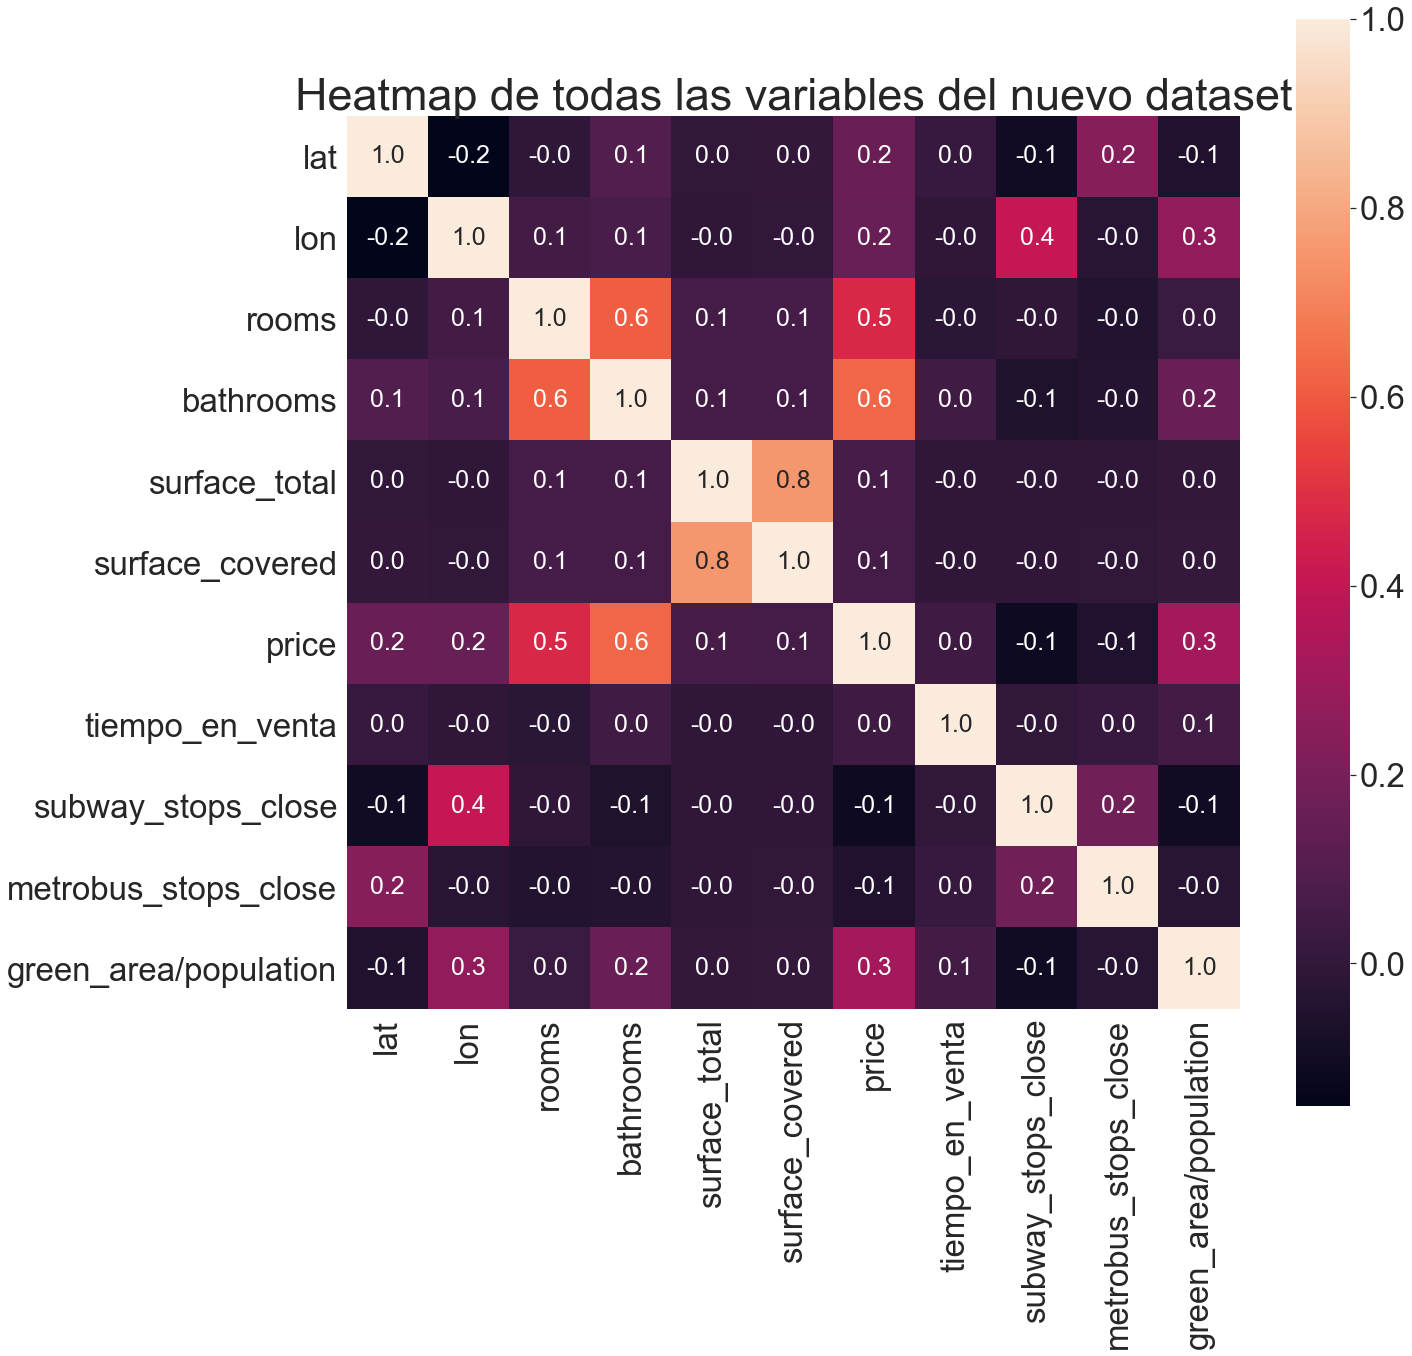

In [61]:
corr = properties_sale_CABA_new_vars.corr()
sns.set(font_scale=3)
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':25})
plt.title("Heatmap de todas las variables del nuevo dataset", fontsize=45)
# plt.savefig("Correlaciones properties all variables.jpg")

In [62]:
df_new_variables = properties_sale_CABA_new_vars.copy()

## Encodeamos la variable "property_type"
Usamos one-hot encoding

In [63]:
df_original = pd.get_dummies(df_original, columns=["property_type"])
df_original.head()

,lat,lon,neighbourhood,rooms,bathrooms,surface_total,surface_covered,price,tiempo_en_venta,property_type_Casa,property_type_Casa de campo,property_type_Departamento,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
92,-34.603771,-58.381587,Villa Crespo,7.0,2.0,130.0,130.0,320000.0,15,0,0,0,0,0,0,0,1
124,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,90000.0,15,0,0,1,0,0,0,0,0
125,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,80000.0,15,0,0,1,0,0,0,0,0
126,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,83000.0,15,0,0,1,0,0,0,0,0
127,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,84000.0,15,0,0,1,0,0,0,0,0


In [64]:
df_new_variables = pd.get_dummies(df_new_variables, columns=["property_type"])
df_new_variables.head()

,lat,lon,neighbourhood,rooms,bathrooms,surface_total,surface_covered,price,tiempo_en_venta,subway_stops_close,metrobus_stops_close,green_area/population,property_type_Casa,property_type_Casa de campo,property_type_Departamento,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
0,-34.603771,-58.381587,Villa Crespo,7.0,2.0,130.0,130.0,320000.0,15,5,6,0.150312,0,0,0,0,0,0,0,1
1,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,90000.0,15,1,0,0.069847,0,0,1,0,0,0,0,0
2,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,80000.0,15,1,0,0.069847,0,0,1,0,0,0,0,0
3,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,83000.0,15,1,0,0.069847,0,0,1,0,0,0,0,0
4,-34.601366,-58.424303,Almagro,1.0,1.0,49.0,44.0,84000.0,15,1,0,0.069847,0,0,1,0,0,0,0,0


## Eliminamos la variable "neighbourhood"

In [65]:
df_original.drop('neighbourhood', axis=1, inplace=True)
df_original.shape

(87096, 16)

In [66]:
df_new_variables.drop('neighbourhood', axis=1, inplace=True)
df_new_variables.shape

(87096, 19)

## Heatmap de correlación con todas las variables numéricas

<AxesSubplot:>

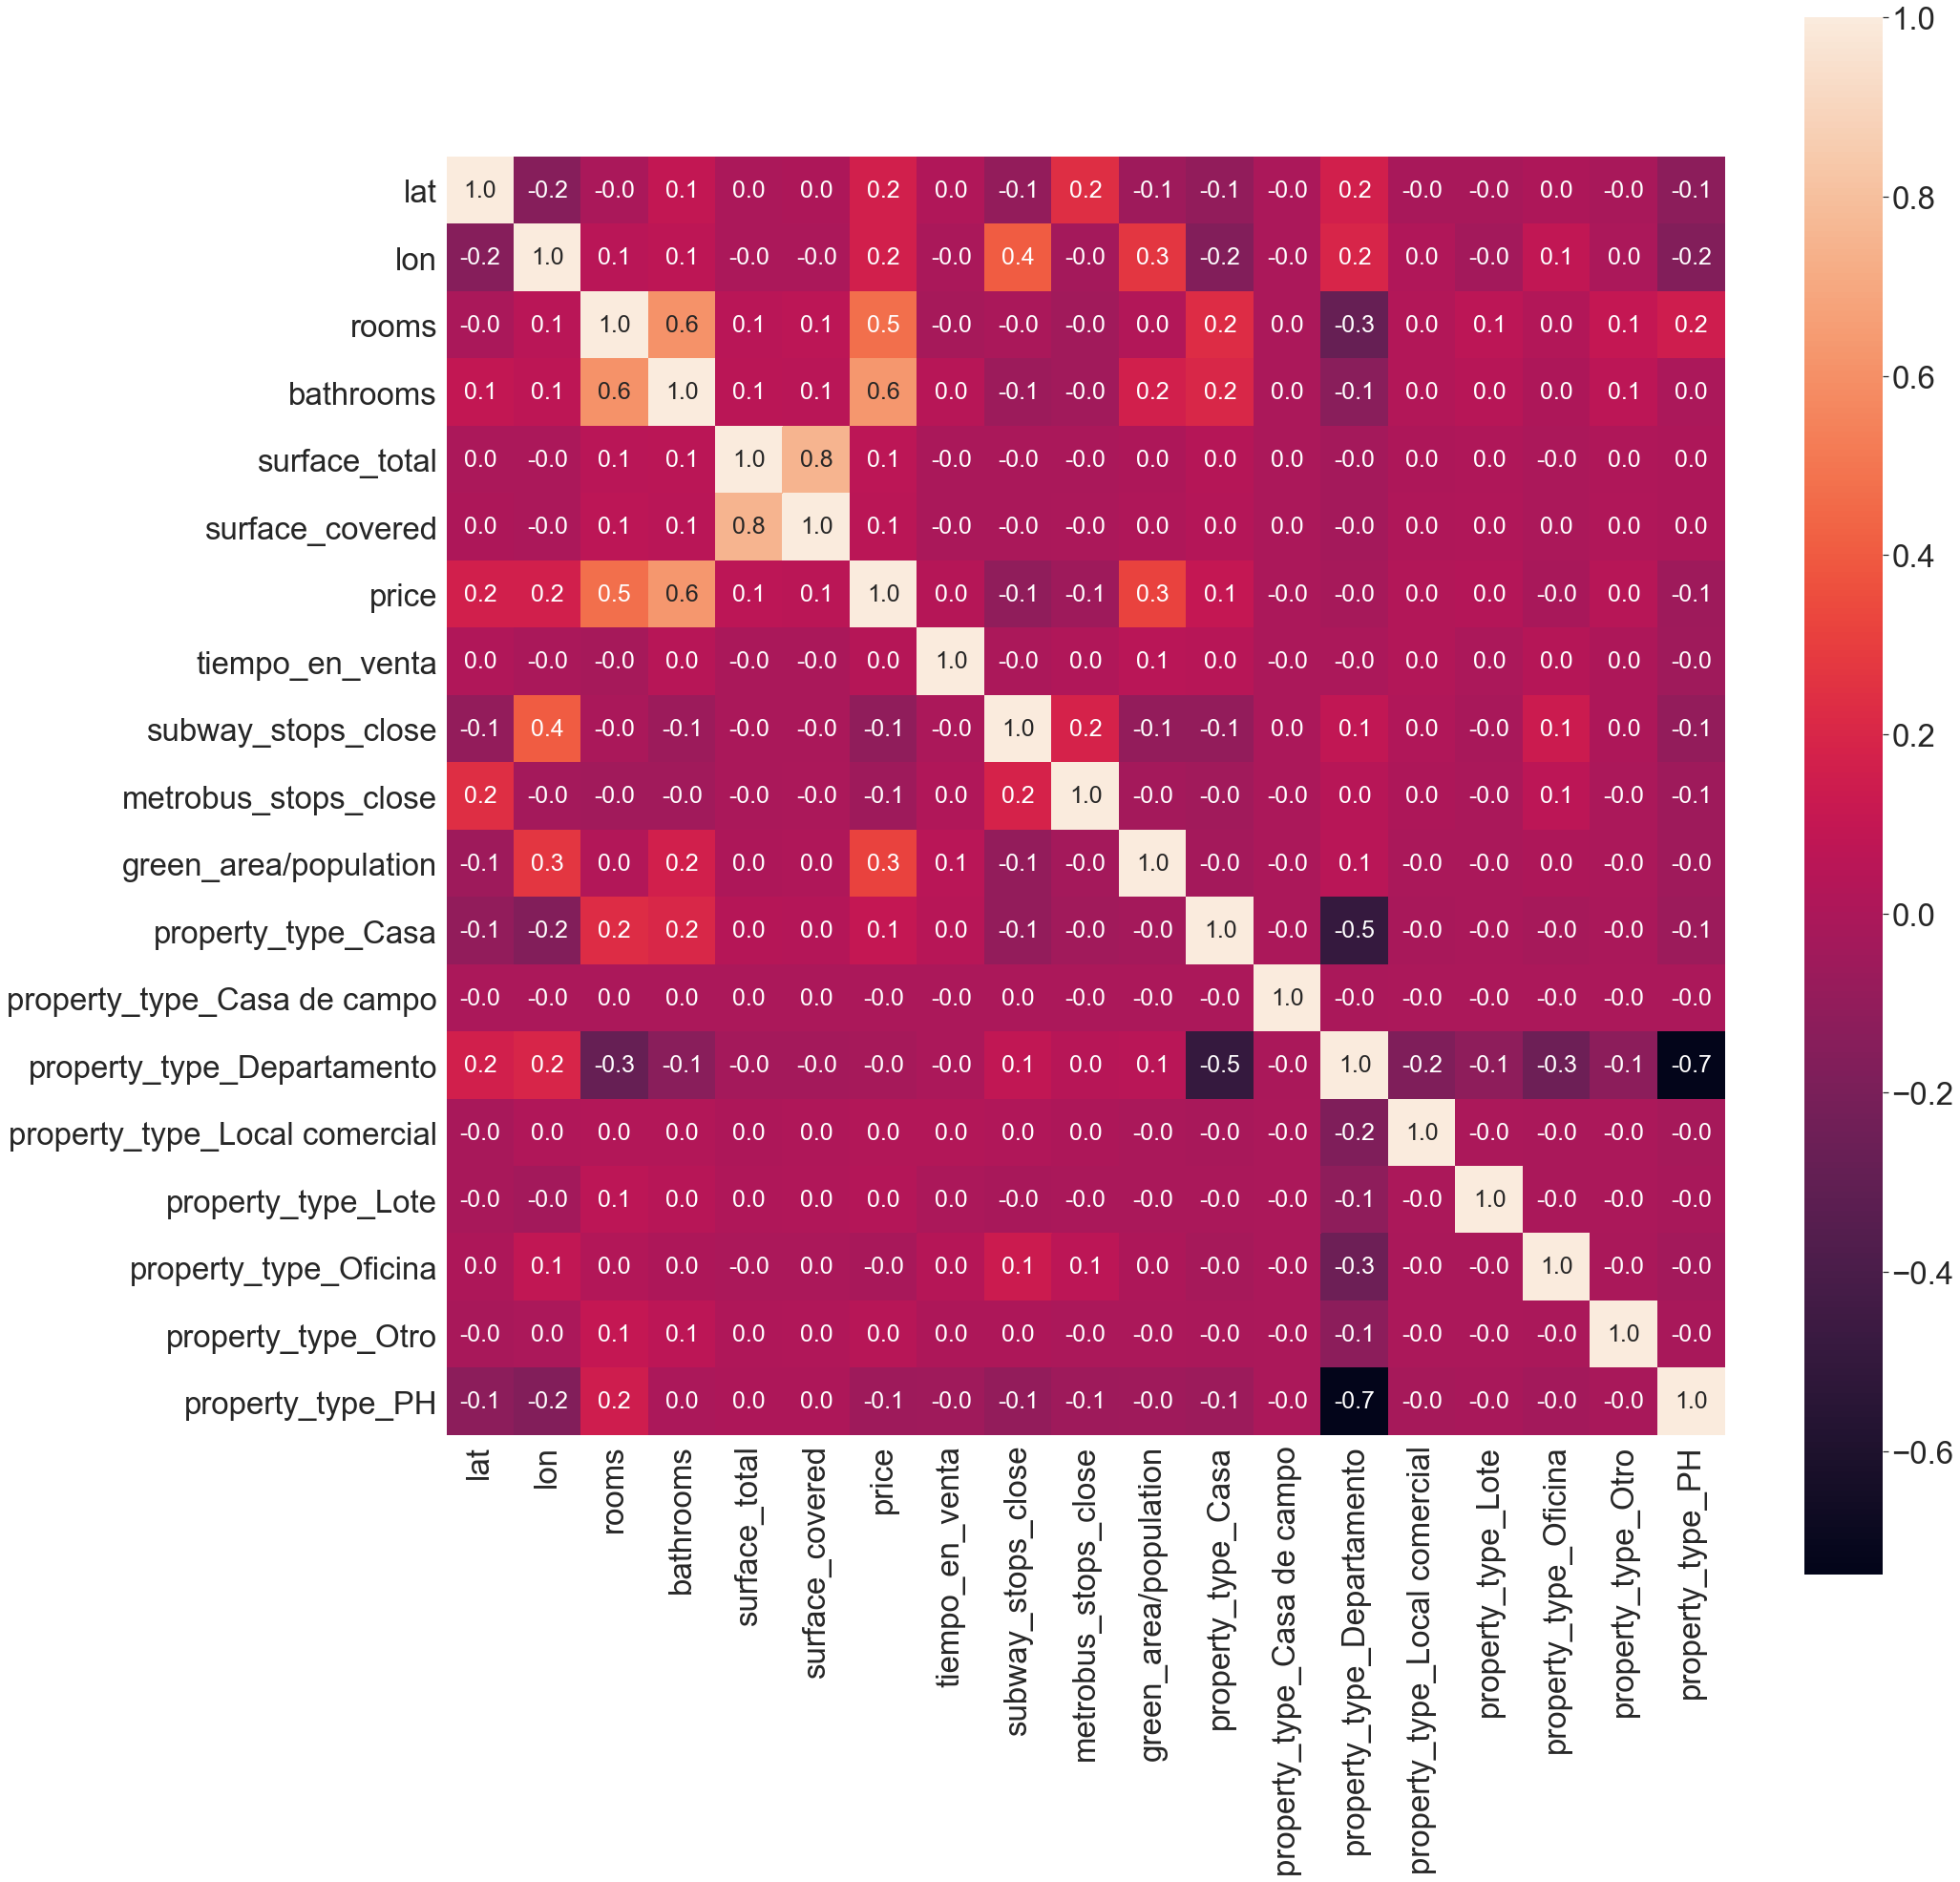

In [67]:
corr = df_new_variables.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':25})

# Modelos de Machine Learning 

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectFromModel

### Función para dividir el dataset en train set (70%) y test data (30%)

In [69]:
def split_data (df):
    X = df.drop('price', axis=1)
    y = df.loc[:, ['price']]
    return train_test_split(X, y, test_size=0.3, random_state=3)

In [70]:
df_new_variables.columns

Index(['lat', 'lon', 'rooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'tiempo_en_venta', 'subway_stops_close',
       'metrobus_stops_close', 'green_area/population', 'property_type_Casa',
       'property_type_Casa de campo', 'property_type_Departamento',
       'property_type_Local comercial', 'property_type_Lote',
       'property_type_Oficina', 'property_type_Otro', 'property_type_PH'],
      dtype='object')

# Métrica a utilizar

In [71]:
def mean_absolute_percentage_error(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

## Linear Regressor

In [72]:
def linear_regression (df):
    X_train, X_test, y_train, y_test = split_data(df)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred_lr_train = cross_val_predict(lr, X_train, y_train, cv=10)
    RMSE_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
    R2_lr_train = r2_score(y_train, y_pred_lr_train)
    MAE_lr_train = mean_absolute_error(y_train, y_pred_lr_train)

    y_pred_lr_test = cross_val_predict(lr, X_test, y_test, cv=10)
    RMSE_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
    R2_lr_test = r2_score(y_test, y_pred_lr_test)
    MAE_lr_train = mean_absolute_error(y_test, y_pred_lr_test)
   
    print('RMSE (train): ', RMSE_lr_train)
    print('RMSE (test): ', RMSE_lr_test)
    print('R2 Score (train): ', R2_lr_train)
    print('R2 Score (test): ', R2_lr_test)
    print('MAE (train): ', MAE_lr_train)
    print('MAE (test): ', MAE_lr_train)

## Random Forest Regressor

In [73]:
def random_forest_regression (df):
    X_train, X_test, y_train, y_test = split_data(df)

    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X_scaled = sc_X.fit_transform(X_train)
    y_scaled = sc_y.fit_transform(np.array(y_train).reshape(-1,1))

    regressor_rf = RandomForestRegressor(random_state=10, bootstrap=False, criterion= "mse", max_depth= None, max_features= "sqrt", n_estimators= 1000)

    y_pred_rf_train = cross_val_predict(regressor_rf, X_train, np.array(y_train).ravel(), cv=10)
    RMSE_rf_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
    R2_rf_train = r2_score(y_train, y_pred_rf_train)
    MAE_rf_train = mean_absolute_error(y_train, y_pred_rf_train)

    y_pred_rf_test = cross_val_predict(regressor_rf, X_test, np.array(y_test).ravel(), cv=10)
    RMSE_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
    R2_rf_test = r2_score(y_test, y_pred_rf_test)
    MAE_rf_test = mean_absolute_error(y_test, y_pred_rf_test)

    print('RMSE (train): ', RMSE_rf_train)
    print('RMSE (test): ', RMSE_rf_test)
    print('R2 Score (train): ', R2_rf_train)
    print('R2 Score (test): ', R2_rf_test)
    print('MAE (train): ', MAE_rf_train)
    print('MAE (test): ', MAE_rf_test)
 
    return regressor_rf

## XGBoost Regressor

In [74]:
def xgboost_regression (df):
    X_train, X_test, y_train, y_test = split_data(df)

    xgboost_reg = XGBRegressor(random_state=10,gamma= 24.47 ,learning_rate=0.1235,max_depth=10,
                      n_estimators=570,subsample=0.74,reg_lambda=0.8)

    y_pred_xgb_train = cross_val_predict(xgboost_reg, X_train, y_train, cv=10)
    RMSE_xgboost_train = np.sqrt(mean_squared_error(y_train, y_pred_xgb_train))
    R2_xgboost_train = r2_score(y_train, y_pred_xgb_train)
    MAE_xgboost_train = mean_absolute_error(y_train, y_pred_xgb_train)

    y_pred_xgb_test = cross_val_predict(xgboost_reg, X_test, y_test, cv=10)
    RMSE_xgboost_test = np.sqrt(mean_squared_error(y_test, y_pred_xgb_test))
    R2_xgboost_test = r2_score(y_test, y_pred_xgb_test)
    MAE_xgboost_test = mean_absolute_error(y_test, y_pred_xgb_test)

    print('RMSE (train): ', RMSE_xgboost_train)
    print('RMSE (test): ', RMSE_xgboost_test)
    print('R2 Score (train): ', R2_xgboost_train)
    print('R2 Score (test): ', R2_xgboost_test)
    print('MAE (train): ', MAE_xgboost_train)
    print('MAE (test): ', MAE_xgboost_test)

In [77]:
linear_regression(df_original)

RMSE (train):  236507.8253156113
RMSE (test):  242146.4761955227
R2 Score (train):  0.44132467668400344
R2 Score (test):  0.4230906503369437
MAE (train):  112005.70017650646
MAE (test):  112005.70017650646


In [78]:
linear_regression(df_new_variables)

RMSE (train):  225011.16007037033
RMSE (test):  230719.82858256402
R2 Score (train):  0.4943190690118988
R2 Score (test):  0.47625352707335544
MAE (train):  104811.08296725627
MAE (test):  104811.08296725627


In [79]:
regressor_original = random_forest_regression(df_original)

RMSE (train):  100660.37915054348
RMSE (test):  117378.62816254259
R2 Score (train):  0.8987988184051914
R2 Score (test):  0.8644406962648181
MAE (train):  35109.07909085111
MAE (test):  41636.51944012376


In [80]:
regressor_new = random_forest_regression(df_new_variables)

RMSE (train):  96437.60955601612
RMSE (test):  113494.83777463033
R2 Score (train):  0.9071116319182018
R2 Score (test):  0.8732629811125412
MAE (train):  33085.901064038946
MAE (test):  39637.497211204434


In [81]:
xgboost_regression(df_original)

RMSE (train):  99078.23956053324
RMSE (test):  120729.03342812633
R2 Score (train):  0.9019550967794814
R2 Score (test):  0.8565915579337979
MAE (train):  35712.4331493037
MAE (test):  41911.36202343384


In [82]:
xgboost_regression(df_new_variables)

RMSE (train):  98590.5591458888
RMSE (test):  120573.86652794569
R2 Score (train):  0.9029179096717916
R2 Score (test):  0.8569599522287585
MAE (train):  35387.01593267057
MAE (test):  41624.28070339559


# Feature selection con RF

In [83]:
X_train, X_test, y_train, y_test = split_data(df_new_variables)
regressor_new.fit(X_train, np.array(y_train).ravel())
importance = pd.DataFrame(regressor_new.feature_importances_,index=X_train.columns,columns=["Importance"])
importance = importance.sort_values(by=['Importance'],ascending=False)
importance

,Importance
surface_covered,0.279614
surface_total,0.214420
bathrooms,0.114493
lon,0.078790
lat,0.074909
rooms,0.073511
green_area/population,0.071997
property_type_Departamento,0.036547
tiempo_en_venta,0.019835
subway_stops_close,0.013478


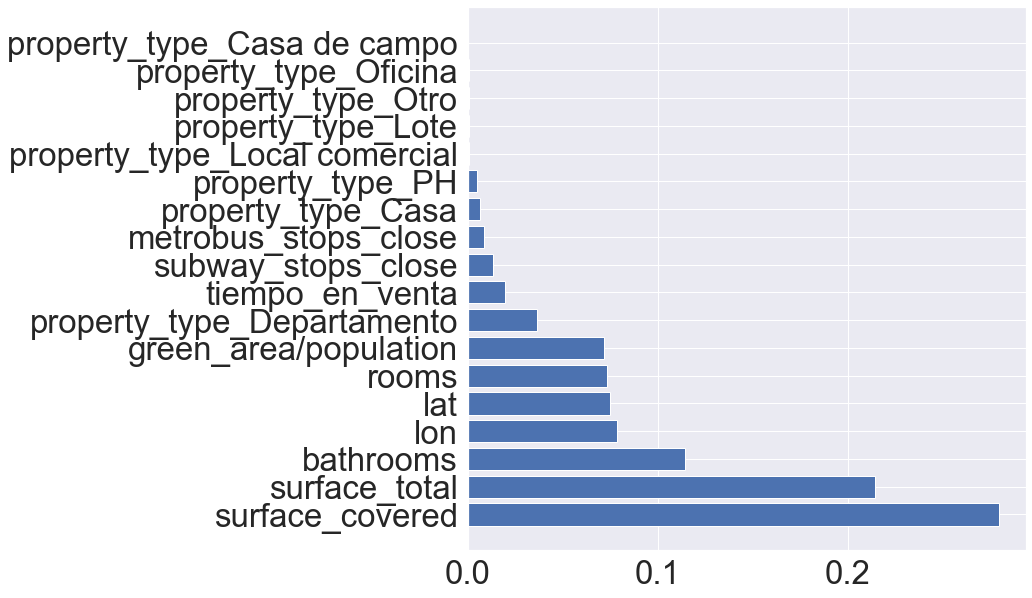

In [84]:
plt.figure(figsize=(10,10))
plt.barh(importance.index, importance['Importance'], )
plt.show()

In [85]:
to_keep = importance[importance['Importance'] > 0.01].index
df_to_keep = df_new_variables.loc[:, to_keep.append(pd.Index(['price']))]
df_to_keep.head(5)

,surface_covered,surface_total,bathrooms,lon,lat,rooms,green_area/population,property_type_Departamento,tiempo_en_venta,subway_stops_close,price
0,130.0,130.0,2.0,-58.381587,-34.603771,7.0,0.150312,0,15,5,320000.0
1,44.0,49.0,1.0,-58.424303,-34.601366,1.0,0.069847,1,15,1,90000.0
2,44.0,49.0,1.0,-58.424303,-34.601366,1.0,0.069847,1,15,1,80000.0
3,44.0,49.0,1.0,-58.424303,-34.601366,1.0,0.069847,1,15,1,83000.0
4,44.0,49.0,1.0,-58.424303,-34.601366,1.0,0.069847,1,15,1,84000.0


## Random Forest con RF selector

In [86]:
random_forest_regression(df_to_keep)

RMSE (train):  96624.71696421024
RMSE (test):  114107.09113918188
R2 Score (train):  0.9067508398528622
R2 Score (test):  0.8718919150238631
MAE (train):  33199.20195144538
MAE (test):  39639.42074283764


RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000,
                      random_state=10)

## XGBoost con RF selector

In [87]:
xgboost_regression(df_to_keep)

RMSE (train):  98726.28272535613
RMSE (test):  121597.18324755512
R2 Score (train):  0.9026504317623887
R2 Score (test):  0.8545216722931069
MAE (train):  35588.95633898897
MAE (test):  41876.40148648742


## No genera mucha mejora

# Feature Selection con Lasso

In [90]:
X_train, X_test, y_train, y_test = split_data(df_new_variables)

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [91]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True])

In [92]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))
print('useless feature: {}'.format(set(df_new_variables.drop('price', axis=1).columns) - set(selected_feat)))

total features: 18
selected features: 16
features with coefficients shrank to zero: 2
useless feature: {'property_type_Casa de campo', 'property_type_Casa'}


### Nos dice que hay dos variables que no son útiles para la predicción: 'property_type_Casa' y 'property_type_Casa de campo'

In [93]:
properties_df_feature_selec = df_new_variables.drop(['property_type_Casa','property_type_Casa de campo'], axis=1)

## Linear Regressor with feature selection

In [94]:
linear_regression(properties_df_feature_selec)

RMSE (train):  225011.16007034748
RMSE (test):  230716.58082358967
R2 Score (train):  0.4943190690120015
R2 Score (test):  0.4762682721461652
MAE (train):  104804.64197392871
MAE (test):  104804.64197392871


## Random Forest Regressor with feature selection

In [96]:
random_forest_regression(properties_df_feature_selec)

RMSE (train):  96297.30172005657
RMSE (test):  113674.734167221
R2 Score (train):  0.9073817233294068
R2 Score (test):  0.8728608905453741
MAE (train):  32996.18233178829
MAE (test):  39500.23090345794


RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000,
                      random_state=10)

## XGBoost Regressor with feature selection

In [97]:
xgboost_regression(properties_df_feature_selec)

RMSE (train):  98666.76255735572
RMSE (test):  120788.54668883346
R2 Score (train):  0.9027677767260979
R2 Score (test):  0.8564501369790376
MAE (train):  35319.51244867709
MAE (test):  41644.5120597564


## No genera mucha mejora